In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from src import utils_ald

In [2]:
data_full = pd.read_csv('data/data_full.csv')
data_full

,gender,medal,type,year,country,abb,longitude,latitude
0,Men,Gold,Archery,1980,Denmark,DEN,9.501785,56.263920
1,Men,Silver,Archery,1980,FR Germany,FRG,10.451526,51.165691
2,Men,Bronze,Archery,1980,Japan,JPN,138.252924,36.204824
3,Men,Gold,Archery,1980,FR Germany,FRG,10.451526,51.165691
4,Men,Silver,Archery,1980,Belgium,BEL,4.469936,50.503887
...,...,...,...,...,...,...,...,...
19440,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19441,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19442,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19443,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004


In [3]:
data_full_drop = data_full.drop(columns=["gender","type","country","abb","year"])
data_full_drop

,medal,longitude,latitude
0,Gold,9.501785,56.263920
1,Silver,10.451526,51.165691
2,Bronze,138.252924,36.204824
3,Gold,10.451526,51.165691
4,Silver,4.469936,50.503887
...,...,...,...
19440,Bronze,-51.925280,-14.235004
19441,Bronze,-51.925280,-14.235004
19442,Bronze,-51.925280,-14.235004
19443,Bronze,-51.925280,-14.235004


In [4]:
type(data_full_drop.medal)

pandas.core.series.Series

In [5]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
def validation_errors(df, models,value):
    y = df[value]
    X = df.drop(columns=[value])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc
def add_decision_boundaries(df, models,value):
    colors = sns.color_palette()
    for model, name in models:
        y = df[value]
        X = df.drop(columns=[value])
        cls = model()
        cls.fit(X, y)
        utils_ald.add_decision_boundary(cls, label=name, color=colors.pop(), region=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


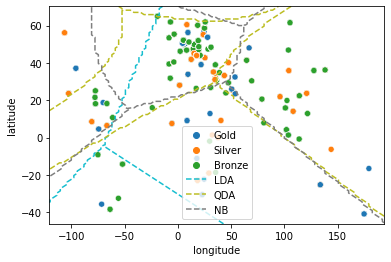

In [6]:
sns.scatterplot(x="longitude", y="latitude", data=data_full_drop, hue="medal")
add_decision_boundaries(data_full_drop, models, "medal")
#plt.savefig("ald/ald_medal_longlat.png")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

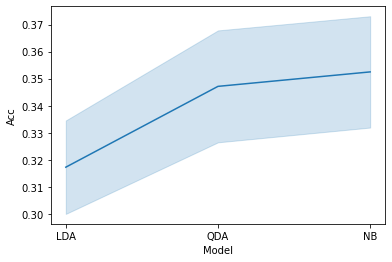

In [7]:
df = pd.DataFrame(validation_errors(data_full_drop, models,"medal"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
#plt.savefig("ald/ald_medal_longlat_accuracy.png")

In [8]:
data_athletics = pd.read_csv('data/medal_country_year_athletics.csv')
data_athletics_drop = data_athletics.drop(columns=["country","year"])
data_athletics_drop

,longitude,latitude,value
0,9.501785,56.263920,S
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,G
4,25.748151,61.924110,S
...,...,...,...
1135,35.529562,-18.665695,B
1136,17.228331,26.335100,0
1137,121.774017,12.879721,0
1138,102.495496,19.856270,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.co

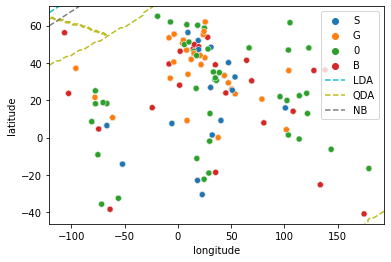

In [9]:
sns.scatterplot(x="longitude", y="latitude", data=data_athletics_drop, hue="value")
add_decision_boundaries(data_athletics_drop, models,"value")
#plt.savefig("ald/athletic_ald_medal_longlat.png")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

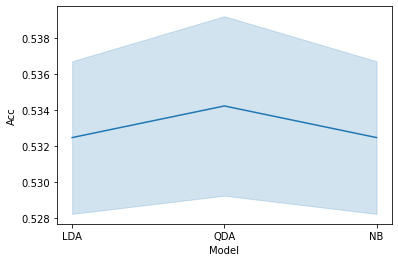

In [10]:
df = pd.DataFrame(validation_errors(data_athletics_drop, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
#plt.savefig("ald/athletic_validation_errors_ald_medal_longlat.png")

In [11]:
data_swimming = pd.read_csv('data/medal_country_year_swimming.csv')
data_swimming_drop = data_swimming.drop(columns=["country","year"])
data_swimming_drop

,longitude,latitude,value
0,9.501785,56.263920,B
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,S
4,25.748151,61.924110,S
...,...,...,...
1135,35.529562,-18.665695,0
1136,17.228331,26.335100,0
1137,121.774017,12.879721,0
1138,102.495496,19.856270,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C

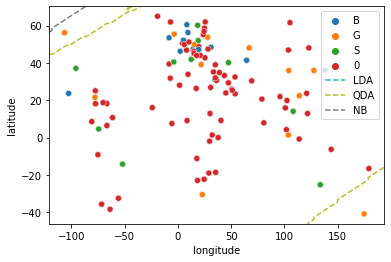

In [12]:
sns.scatterplot(x="longitude", y="latitude", data=data_swimming_drop, hue="value")
add_decision_boundaries(data_swimming_drop, models,"value")
#plt.savefig("ald/swimming_ald_medal_longlat.png")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

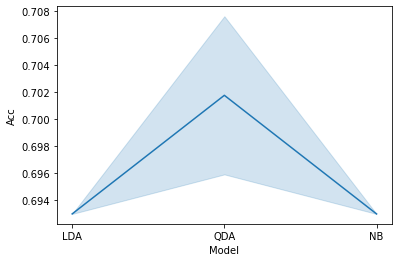

In [13]:
df = pd.DataFrame(validation_errors(data_swimming_drop, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
#plt.savefig("ald/swimming_validation_errors_ald_medal_longlat.png")

In [31]:
medal_by_country = pd.read_csv('data/medal_by_country_coor.csv')
medal_by_country

,country,gold,silver,bronze,total,longitude,latitude,class
0,FR Germany,289,218,198,1501,10.451526,51.165691,1
1,Sweden,190,205,143,1123,18.643501,60.128161,1
2,Belgium,79,73,70,453,4.469936,50.503887,1
3,Great Britain,439,502,483,2804,-3.435973,55.378051,1
4,Netherlands,189,239,237,1282,5.291266,52.132633,1
...,...,...,...,...,...,...,...,...
110,Syria,0,0,1,1,38.996815,34.802075,4
111,Kazakhstan,1,1,0,5,66.923684,48.019573,4
112,Faroe Islands,1,7,5,22,-6.911806,61.892635,4
113,Peru,2,1,2,10,-75.015152,-9.189967,4


In [15]:
medal_by_country.drop(columns=["country","longitude","latitude"])


,gold,silver,bronze,total,class
0,289,218,198,1501,1
1,190,205,143,1123,1
2,79,73,70,453,1
3,439,502,483,2804,1
4,189,239,237,1282,1
...,...,...,...,...,...
110,0,0,1,1,4
111,1,1,0,5,4
112,1,7,5,22,4
113,2,1,2,10,4


In [18]:
X = medal_by_country[['gold', 'silver', 'bronze', 'total']]
y = medal_by_country['class']
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [21]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.4512626262626263


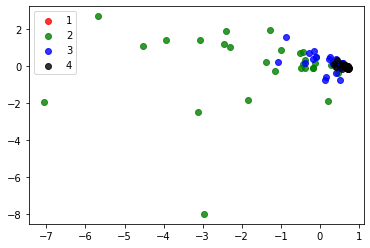

In [30]:
#define data to plot
X = medal_by_country.drop(columns=["country","longitude","latitude","class"])
y = medal_by_country["class"]
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = [1,2,3,4]

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue','black']
lw = 2
for color, i, target_name in zip(colors, [0,1,2,3], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [33]:
a = medal_by_country.drop(columns=["country",'silver','gold','bronze','total'])
a

,longitude,latitude,class
0,10.451526,51.165691,1
1,18.643501,60.128161,1
2,4.469936,50.503887,1
3,-3.435973,55.378051,1
4,5.291266,52.132633,1
...,...,...,...
110,38.996815,34.802075,4
111,66.923684,48.019573,4
112,-6.911806,61.892635,4
113,-75.015152,-9.189967,4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


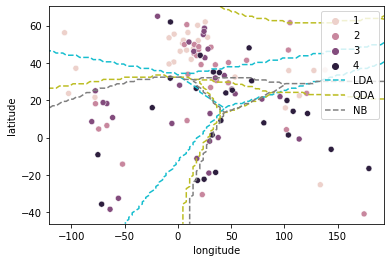

In [34]:
sns.scatterplot(x="longitude", y="latitude", data=a, hue="class")
add_decision_boundaries(a, models, "class")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

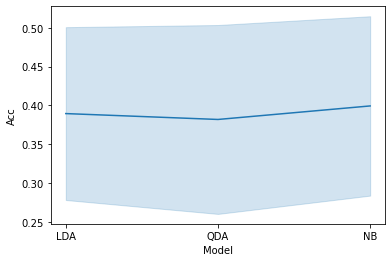

In [36]:
df = pd.DataFrame(validation_errors(a, models,"class"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [39]:
b = pd.read_csv('medal_by_country/medal_country_all.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,B
1,1,10.451526,51.165691,FR Germany,G
2,2,-106.346771,56.130366,Canada,G
3,3,-102.552784,23.634501,Mexico,B
4,4,25.748151,61.924110,Finland,B
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,B
110,110,17.228331,26.335100,Libya,B
111,111,121.774017,12.879721,Philippines,B
112,112,102.495496,19.856270,Laos,B


In [41]:
b1 = b.drop(columns=["number",'country'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


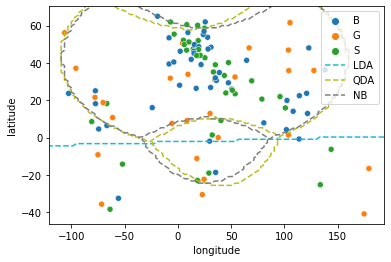

In [44]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

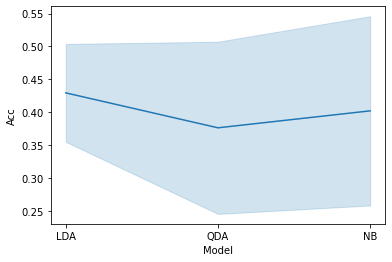

In [46]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [51]:
b = pd.read_csv('medal_by_country/medal_country_Athletics.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,G
1,1,10.451526,51.165691,FR Germany,G
2,2,-106.346771,56.130366,Canada,G
3,3,-102.552784,23.634501,Mexico,S
4,4,25.748151,61.924110,Finland,S
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,B
110,110,17.228331,26.335100,Libya,O
111,111,121.774017,12.879721,Philippines,O
112,112,102.495496,19.856270,Laos,O


In [52]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,G
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,S
4,25.748151,61.924110,S
...,...,...,...
109,35.529562,-18.665695,B
110,17.228331,26.335100,O
111,121.774017,12.879721,O
112,102.495496,19.856270,O


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(


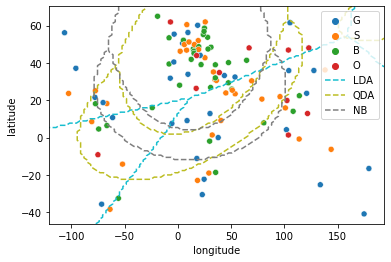

In [53]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

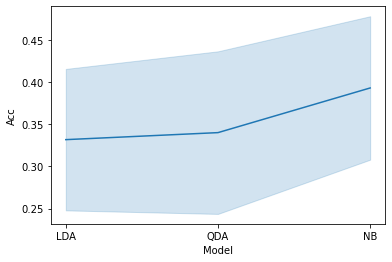

In [54]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [57]:
b = pd.read_csv('medal_by_country/medal_country_Swimming.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,B
1,1,10.451526,51.165691,FR Germany,G
2,2,-106.346771,56.130366,Canada,G
3,3,-102.552784,23.634501,Mexico,G
4,4,25.748151,61.924110,Finland,B
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,O
110,110,17.228331,26.335100,Libya,O
111,111,121.774017,12.879721,Philippines,O
112,112,102.495496,19.856270,Laos,O


In [58]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,B
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,G
4,25.748151,61.924110,B
...,...,...,...
109,35.529562,-18.665695,O
110,17.228331,26.335100,O
111,121.774017,12.879721,O
112,102.495496,19.856270,O


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


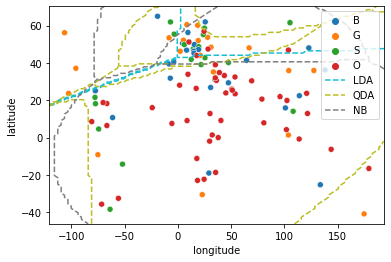

In [59]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

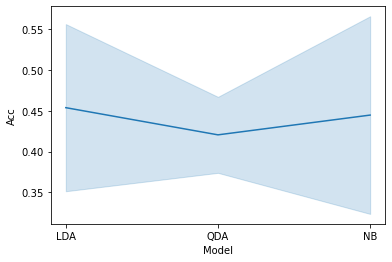

In [60]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [61]:
b = pd.read_csv('medal_by_country/medal_country_Basketball.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,O
1,1,10.451526,51.165691,FR Germany,S
2,2,-106.346771,56.130366,Canada,G
3,3,-102.552784,23.634501,Mexico,O
4,4,25.748151,61.924110,Finland,O
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,O
110,110,17.228331,26.335100,Libya,O
111,111,121.774017,12.879721,Philippines,O
112,112,102.495496,19.856270,Laos,O


In [62]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,O
1,10.451526,51.165691,S
2,-106.346771,56.130366,G
3,-102.552784,23.634501,O
4,25.748151,61.924110,O
...,...,...,...
109,35.529562,-18.665695,O
110,17.228331,26.335100,O
111,121.774017,12.879721,O
112,102.495496,19.856270,O


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature nam

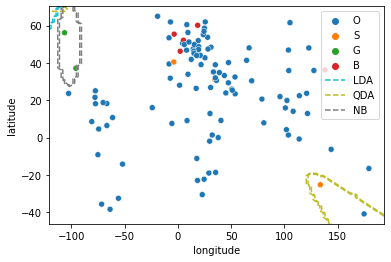

In [63]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warning

<AxesSubplot:xlabel='Model', ylabel='Acc'>

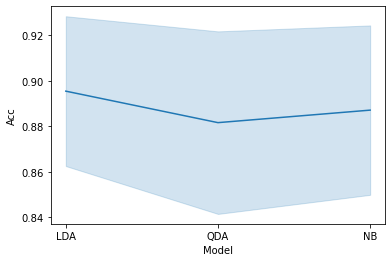

In [64]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [65]:
b = pd.read_csv('medal_by_country/medal_country_Powerlifting.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,O
1,1,10.451526,51.165691,FR Germany,O
2,2,-106.346771,56.130366,Canada,S
3,3,-102.552784,23.634501,Mexico,B
4,4,25.748151,61.924110,Finland,G
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,O
110,110,17.228331,26.335100,Libya,B
111,111,121.774017,12.879721,Philippines,B
112,112,102.495496,19.856270,Laos,B


In [66]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,O
1,10.451526,51.165691,O
2,-106.346771,56.130366,S
3,-102.552784,23.634501,B
4,25.748151,61.924110,G
...,...,...,...
109,35.529562,-18.665695,O
110,17.228331,26.335100,B
111,121.774017,12.879721,B
112,102.495496,19.856270,B


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.co

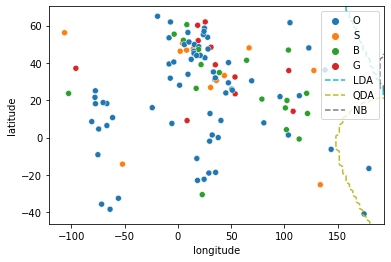

In [67]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

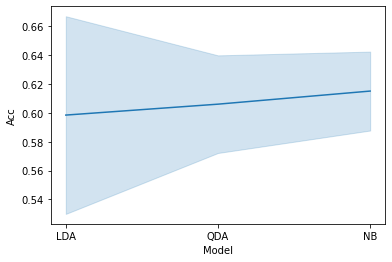

In [68]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [69]:
b = pd.read_csv('medal_by_country/medal_country_Table_Tennis.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,B
1,1,10.451526,51.165691,FR Germany,G
2,2,-106.346771,56.130366,Canada,B
3,3,-102.552784,23.634501,Mexico,S
4,4,25.748151,61.924110,Finland,G
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,O
110,110,17.228331,26.335100,Libya,O
111,111,121.774017,12.879721,Philippines,B
112,112,102.495496,19.856270,Laos,O


In [70]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,B
1,10.451526,51.165691,G
2,-106.346771,56.130366,B
3,-102.552784,23.634501,S
4,25.748151,61.924110,G
...,...,...,...
109,35.529562,-18.665695,O
110,17.228331,26.335100,O
111,121.774017,12.879721,B
112,102.495496,19.856270,O


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(


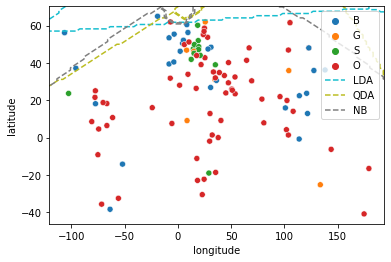

In [71]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

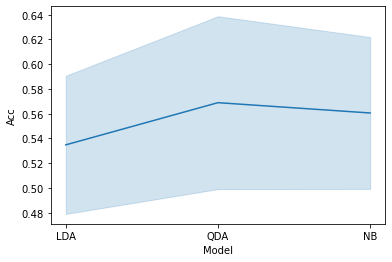

In [72]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")

In [73]:
b = pd.read_csv('medal_by_country/medal_country_Wheelchair_Tennis.csv')
b

,number,longitude,latitude,country,value
0,0,9.501785,56.263920,Denmark,B
1,1,10.451526,51.165691,FR Germany,G
2,2,-106.346771,56.130366,Canada,B
3,3,-102.552784,23.634501,Mexico,S
4,4,25.748151,61.924110,Finland,G
...,...,...,...,...,...
109,109,35.529562,-18.665695,Mozambique,O
110,110,17.228331,26.335100,Libya,O
111,111,121.774017,12.879721,Philippines,B
112,112,102.495496,19.856270,Laos,O


In [74]:
b1 = b.drop(columns=["number",'country'])
b1

,longitude,latitude,value
0,9.501785,56.263920,B
1,10.451526,51.165691,G
2,-106.346771,56.130366,B
3,-102.552784,23.634501,S
4,25.748151,61.924110,G
...,...,...,...
109,35.529562,-18.665695,O
110,17.228331,26.335100,O
111,121.774017,12.879721,B
112,102.495496,19.856270,O


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(


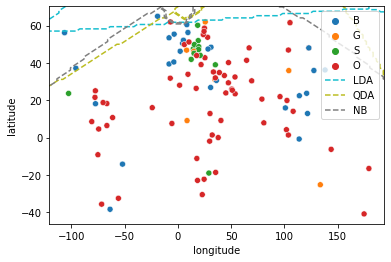

In [75]:
sns.scatterplot(x="longitude", y="latitude", data=b1, hue="value")
add_decision_boundaries(b1, models, "value")

<AxesSubplot:xlabel='Model', ylabel='Acc'>

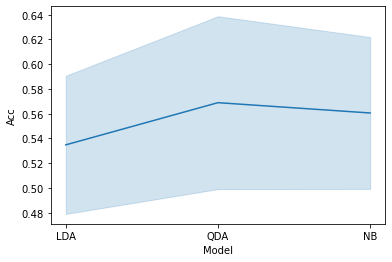

In [76]:
df = pd.DataFrame(validation_errors(b1, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")